github: https://github.com/httpswlt/DataMine 
data: the USvideos of Trending-YouTube-Video-Statistics

# Analysis Trending YouTube Video Statistics


## Importing libraries

In [1]:
import pandas as pd
import numpy as np

import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

matplotlib.rcParams['figure.figsize'] = (10, 10)

## Reading in a dataset

In [3]:
my_df = pd.read_csv('./USvideos.csv', index_col='video_id')
my_df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
video_id,,,,,,,,,,,,,,,
2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Processing the dates

In [4]:
my_df['trending_date'] = pd.to_datetime(my_df['trending_date'], format='%y.%d.%m')
my_df['trending_date'].head()

video_id
2kyS6SvSYSE   2017-11-14
1ZAPwfrtAFY   2017-11-14
5qpjK5DgCt4   2017-11-14
puqaWrEC7tY   2017-11-14
d380meD0W0M   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [5]:
my_df['publish_time'] = pd.to_datetime(my_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
my_df['publish_time'].head()

video_id
2kyS6SvSYSE   2017-11-13 17:13:01
1ZAPwfrtAFY   2017-11-13 07:30:00
5qpjK5DgCt4   2017-11-12 19:05:24
puqaWrEC7tY   2017-11-13 11:00:04
d380meD0W0M   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [6]:
my_df.insert(4, 'publish_date', my_df['publish_time'].dt.date)
my_df['publish_time'] = my_df['publish_time'].dt.time
my_df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
video_id,,
2kyS6SvSYSE,2017-11-13,17:13:01
1ZAPwfrtAFY,2017-11-13,07:30:00
5qpjK5DgCt4,2017-11-12,19:05:24
puqaWrEC7tY,2017-11-13,11:00:04
d380meD0W0M,2017-11-12,18:01:41


## Processing data types

In [7]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    my_df[column] = my_df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    my_df[column] = my_df[column].astype(str)

### Processing category_id column

In [10]:
id_to_category = {}

with open('./US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [11]:
my_df.insert(4, 'category', my_df['category_id'].map(id_to_category))
my_df[['category_id', 'category']].head()

,category_id,category
video_id,,
2kyS6SvSYSE,22,People & Blogs
1ZAPwfrtAFY,24,Entertainment
5qpjK5DgCt4,23,Comedy
puqaWrEC7tY,24,Entertainment
d380meD0W0M,24,Entertainment


## Correlation analysis and heatmap

In [12]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] # only looking at correlations between these variables
corr_matrix = my_df[keep_columns].corr()
corr_matrix

,views,likes,dislikes,comment_count
views,1.000000,0.849177,0.472213,0.617621
likes,0.849177,1.000000,0.447186,0.803057
dislikes,0.472213,0.447186,1.000000,0.700184
comment_count,0.617621,0.803057,0.700184,1.000000


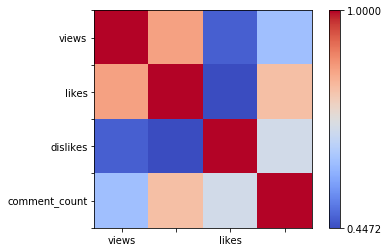

In [13]:
fig, ax = plt.subplots()
heatmap = ax.imshow(corr_matrix, interpolation='nearest', cmap=cm.coolwarm)

# making the colorbar on the side
cbar_min = corr_matrix.min().min()
cbar_max = corr_matrix.max().max()
cbar = fig.colorbar(heatmap, ticks=[cbar_min, cbar_max])

# making the labels
labels = ['']
for column in keep_columns:
    labels.append(column)
    labels.append('')
ax.set_yticklabels(labels, minor=False)
ax.set_xticklabels(labels, minor=False)

plt.show()

## Handling videos that trended in multiple days

In [14]:
print(my_df.shape)
my_df = my_df[~my_df.index.duplicated(keep='last')]
print(my_df.shape)
my_df.index.duplicated().any()

(40949, 17)
(6351, 17)


False

## Visualizing most statistics

In [15]:
def visualize_most(my_df, column, num=10): # getting the top 10 videos by default
    sorted_df = my_df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

d:\environment\python3.7.5\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\environment\python3.7.5\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\environment\python3.7.5\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\environment\python3.7.5\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\environment\python3.7.5\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
d:\environment\python3.7.5\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48169 mi

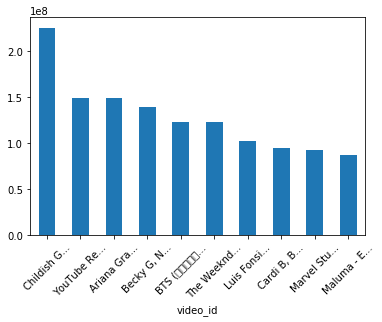

In [16]:
visualize_most(my_df, 'views')

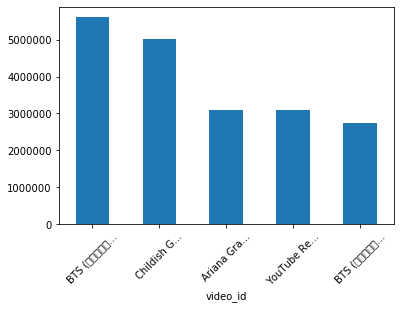

In [17]:

visualize_most(my_df, 'likes', num=5) # only visualizes the top 5

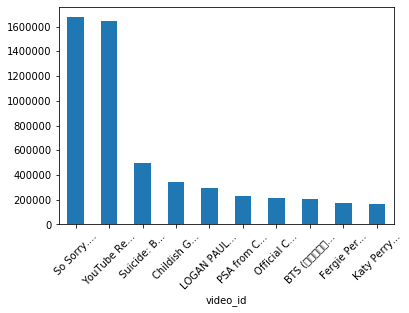

In [18]:
visualize_most(my_df, 'dislikes')

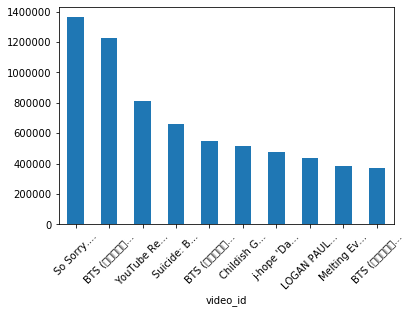

In [19]:
visualize_most(my_df, 'comment_count')

## Video-specific statistics visualizations

In [20]:
def visualize_statistics(my_df, id_list): # taking a list of video ids
    target_df = my_df.loc[id_list]
    
    ax = target_df[['views', 'likes', 'dislikes', 'comment_count']].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

def visualize_like_dislike(my_df, id_list):
    target_df = my_df.loc[id_list]
    
    ax = target_df[['likes', 'dislikes']].plot.bar(stacked=True)
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

In [21]:

sample_id_list = my_df.sample(n=10, random_state=4).index # creates a random sample of 10 video IDs
sample_id_list

Index(['FDbb28N7iI8', 'FaJmopuuhZE', 'Q1INhRBrwKM', '1iUgR_lKn1c',
       'aD5dCMBeySA', 'zkrq7Kpd1so', 'XVKg8uPSb5s', 'M3W0ELaAOIg',
       'RxvcH25WThg', 'oMOljrWUUXc'],
      dtype='object', name='video_id')

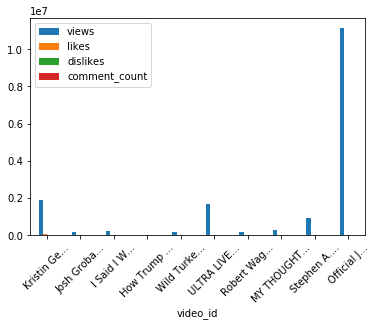

In [22]:
visualize_statistics(my_df, sample_id_list)

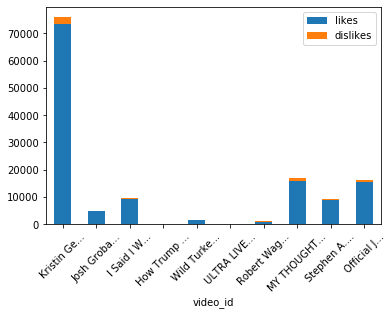

In [23]:
visualize_like_dislike(my_df, sample_id_list)

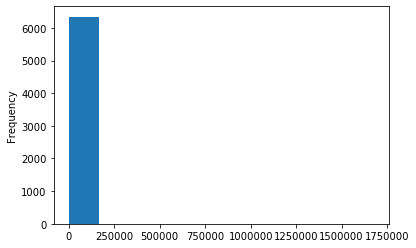

In [24]:
my_df['dislikes'].plot.hist()

plt.show()

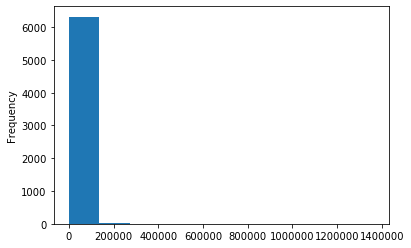

In [25]:
my_df['comment_count'].plot.hist()

plt.show()


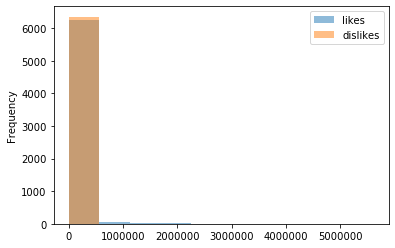

In [26]:
my_df[['likes', 'dislikes']].plot.hist(alpha=0.5)

plt.show()

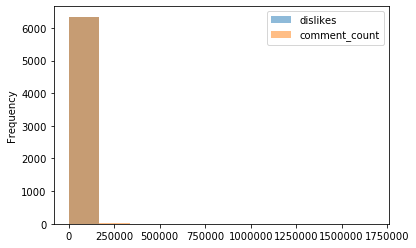

In [27]:
my_df[['dislikes', 'comment_count']].plot.hist(alpha=0.5)

plt.show()


## Category analysis

In [28]:
category_count = my_df['category'].value_counts() # frequency for each category
category_count


Entertainment            1621
Music                     801
Howto & Style             594
Comedy                    544
News & Politics           504
People & Blogs            495
Sports                    449
Science & Technology      381
Film & Animation          320
Education                 251
Pets & Animals            140
Gaming                    103
Autos & Vehicles           71
Travel & Events            59
Nonprofits & Activism      14
Shows                       4
Name: category, dtype: int64

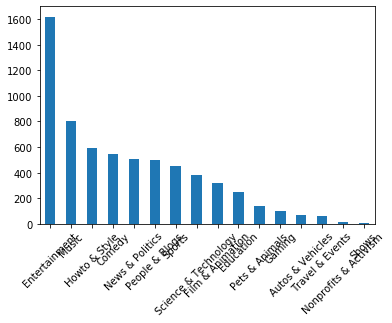

In [29]:

ax = category_count.plot.bar()
ax.set_xticklabels(labels=category_count.index, rotation=45, fontsize=10)

plt.show()